**HANDWRITTEN TEXT EXTRACTION FROM AN IMAGE**:

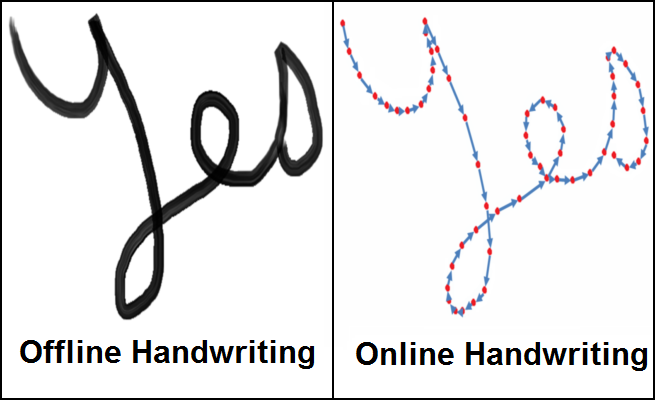


It is widely used method to produce effective communication between Documents and computers. Mostly we use OCR to extract text from different kinds of documents.We know there are two types of Handwritten text extraction from image offline mode and online mode, Where data is taken, follow a Deep learning classification algorthim is called Offline mode.
In this notebook, I build an algorthim which works offline mode to predict text from an images.

Github reps call

In [ ]:
!git clone https://github.com/foxed838/handwritten

fatal: destination path 'handwritten' already exists and is not an empty directory.


Making Dir for kaggle dataset download

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /content/handwritten/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d landlord/handwriting-recognition

handwriting-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting Zipfile to a colab Dir

In [ ]:
!unzip /content/handwriting-recognition.zip -d "/content/handwritten"

Streaming output truncated to the last 5000 lines.
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5003.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5004.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5005.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5006.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5007.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5008.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5009.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5010.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5011.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5012.jpg  
  inflating: /content/handwritten/validation_v2/validation/VALIDATION_5013.jpg  
  inflating: /content/handwritten/validation_v2/validation

Importing Required Libraries

In [ ]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam



In [ ]:
train = pd.read_csv('/content/handwritten/written_name_train_v2.csv')
valid = pd.read_csv('/content/handwritten/written_name_validation_v2.csv')

**Data Analysis**

In [ ]:
print(train.head(), valid.head())
print(train.describe(), valid.describe())
print(train.value_counts(), valid.value_counts())

          FILENAME   IDENTITY
0  TRAIN_00001.jpg  BALTHAZAR
1  TRAIN_00002.jpg      SIMON
2  TRAIN_00003.jpg      BENES
3  TRAIN_00004.jpg    LA LOVE
4  TRAIN_00005.jpg     DAPHNE               FILENAME    IDENTITY
0  VALIDATION_0001.jpg       BILEL
1  VALIDATION_0002.jpg  LAUMIONIER
2  VALIDATION_0003.jpg         LEA
3  VALIDATION_0004.jpg   JEAN-ROCH
4  VALIDATION_0005.jpg        RUPP
               FILENAME IDENTITY
count            330961   330396
unique           330961   100539
top     TRAIN_00001.jpg   THOMAS
freq                  1     1825                    FILENAME IDENTITY
count                 41370    41292
unique                41370    20227
top     VALIDATION_0001.jpg   THOMAS
freq                      1      219
FILENAME          IDENTITY 
TRAIN_00001.jpg   BALTHAZAR    1
TRAIN_291526.jpg  CAMPOURCY    1
TRAIN_291506.jpg  BELLO        1
TRAIN_291505.jpg  BOISSIERE    1
TRAIN_291504.jpg  LOUNA        1
                              ..
TRAIN_191201.jpg  CHOMEL       1
T

**Checking Null Values and Removing it**

In [ ]:
print(train.isnull().sum())
print(valid.isnull().sum())

FILENAME      0
IDENTITY    565
dtype: int64
FILENAME     0
IDENTITY    78
dtype: int64


In [ ]:
print(train.dropna())
print(valid.dropna())
print(train.isnull().sum())
print(valid.isnull().sum())

                FILENAME       IDENTITY
0        TRAIN_00001.jpg      BALTHAZAR
1        TRAIN_00002.jpg          SIMON
2        TRAIN_00003.jpg          BENES
3        TRAIN_00004.jpg        LA LOVE
4        TRAIN_00005.jpg         DAPHNE
...                  ...            ...
330956  TRAIN_330957.jpg          LENNY
330957  TRAIN_330958.jpg        TIFFANY
330958  TRAIN_330959.jpg  COUTINHO DESA
330959  TRAIN_330960.jpg         MOURAD
330960  TRAIN_330961.jpg        HELOISE

[330396 rows x 2 columns]
                   FILENAME    IDENTITY
0       VALIDATION_0001.jpg       BILEL
1       VALIDATION_0002.jpg  LAUMIONIER
2       VALIDATION_0003.jpg         LEA
3       VALIDATION_0004.jpg   JEAN-ROCH
4       VALIDATION_0005.jpg        RUPP
...                     ...         ...
41365  VALIDATION_41366.jpg    CHAILLAN
41366  VALIDATION_41367.jpg      BAROUH
41367  VALIDATION_41368.jpg     MAXENCE
41368  VALIDATION_41369.jpg     HAMELIN
41369  VALIDATION_41370.jpg        LOLA

[41292 rows 

Data Pre-processing


In [ ]:
list_1=list(train.columns)
list_cate=[]
for i in list_1:
    if train[i].dtype=='object':
        list_cate.append(i)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_cate:
    train[i]=le.fit_transform(train[i])

In [ ]:
print(train)
X = train.drop('FILENAME',axis=1)
y = train['FILENAME']

        FILENAME  IDENTITY
0              0      6790
1              1     88373
2              2      9411
3              3     54452
4              4     24870
...          ...       ...
330956    264052     59046
330957    264053     92820
330958    264054     23178
330959    264056     70125
330960    264057     46219

[330961 rows x 2 columns]


**EXPLORATORY DATA ANALYSIS**

In [ ]:
train.corr()

,FILENAME,IDENTITY
FILENAME,1.000000,0.000332
IDENTITY,0.000332,1.000000


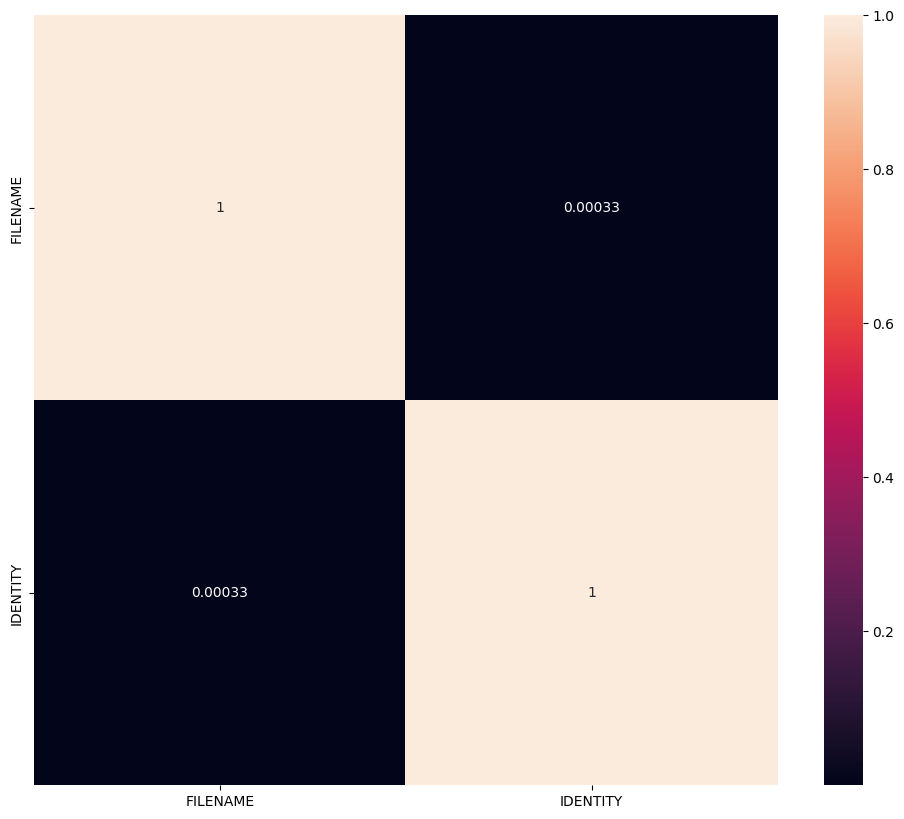

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(train.corr(), annot =True)

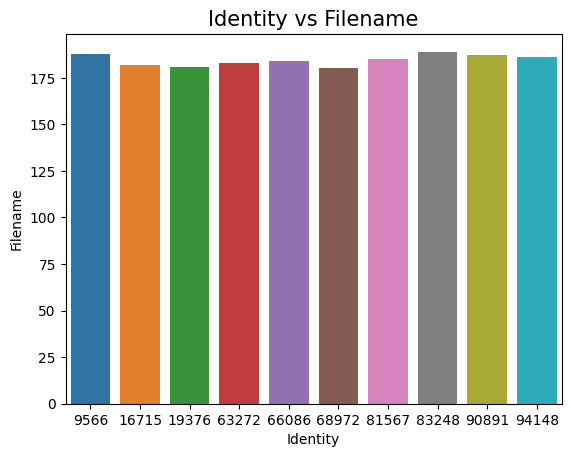

In [ ]:
plt.style.use("default")
sns.barplot(x="IDENTITY", y="FILENAME",data=train[180:190])
plt.title("Identity vs Filename",fontsize=15)
plt.xlabel("Identity")
plt.ylabel("Filename")
plt.show()

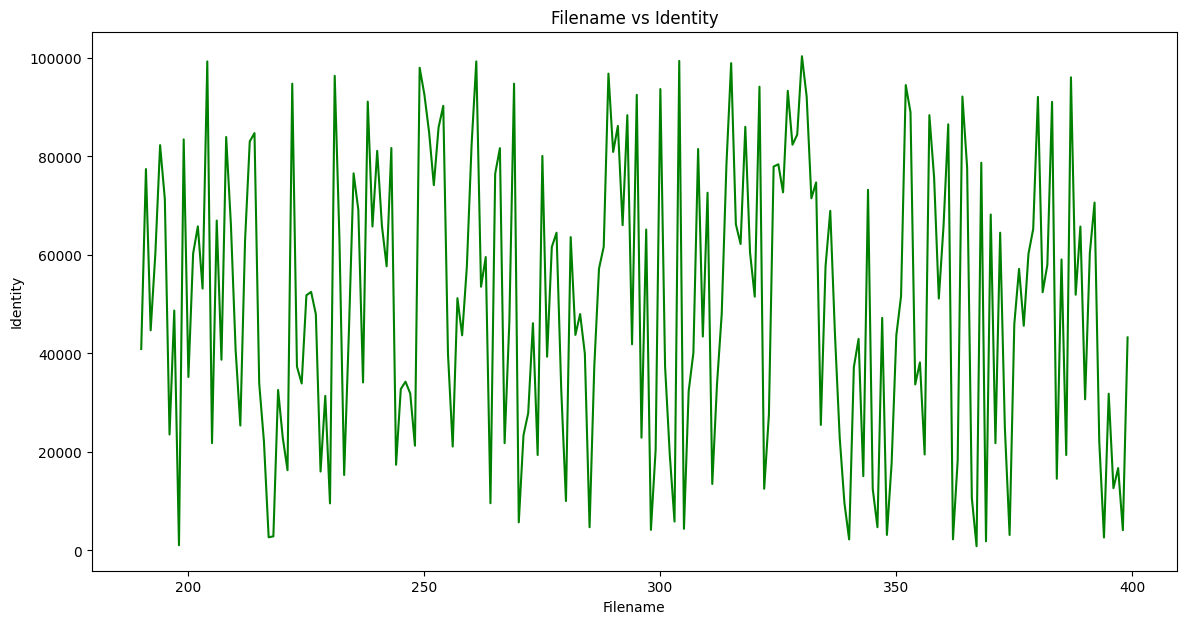

In [ ]:
plt.style.use("default")
plt.figure(figsize=(14,7))
sns.lineplot(x = "FILENAME",y = "IDENTITY",data = train[190:400], color='g')
plt.title("Filename vs Identity")
plt.xlabel("Filename")
plt.ylabel("Identity")
plt.show()

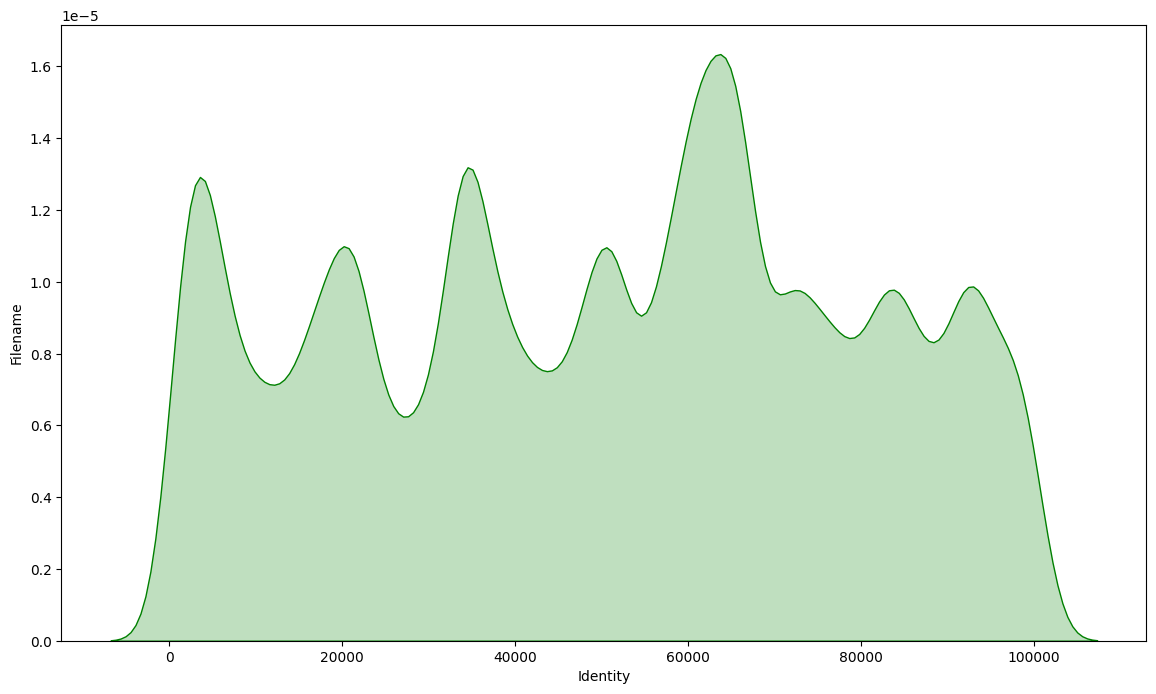

In [ ]:
plt.style.use("default")
plt.figure(figsize=(14,8))
plt.xlabel('Identity')
plt.ylabel('Filename')
sns.kdeplot(train['IDENTITY'],shade=True,color='g')
plt.show()

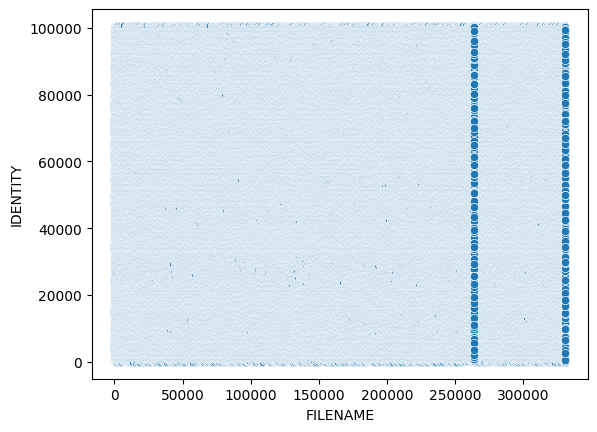

In [ ]:
sns.scatterplot(x='FILENAME',y="IDENTITY",data=train)

Re-assigning the train.csv, valid.csv

In [ ]:
train = pd.read_csv('/content/handwritten/written_name_train_v2.csv')
valid = pd.read_csv('/content/handwritten/written_name_validation_v2.csv')

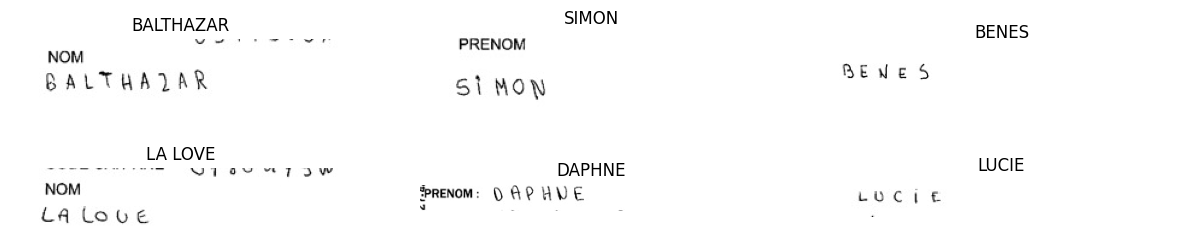

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/handwritten/train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
print("Number of NaNs in train set      : ", train['IDENTITY'].isnull().sum())
print("Number of NaNs in validation set : ", valid['IDENTITY'].isnull().sum())

Number of NaNs in train set      :  565
Number of NaNs in validation set :  78


In [ ]:
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

In [ ]:
train = train[train['IDENTITY'] != 'UNREADABLE']
valid = valid[valid['IDENTITY'] != 'UNREADABLE']

In [ ]:
train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()

In [ ]:
train.reset_index(inplace = True, drop=True) 
valid.reset_index(inplace = True, drop=True)

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # blank white image
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [ ]:
train_size = 30000
valid_size= 3000

In [ ]:
train_x = []

for i in range(train_size):
    img_dir = '/content/handwritten/train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    train_x.append(image)

In [ ]:
valid_x = []

for i in range(valid_size):
    img_dir = '/content/handwritten/validation_v2/validation/'+valid.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    valid_x.append(image)

In [ ]:
train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

In [ ]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 64 # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [ ]:
name = 'JEBASTIN'
print(name, '\n',label_to_num(name))

JEBASTIN 
 [ 9  4  1  0 18 19  8 13]


In [ ]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])]= label_to_num(train.loc[i, 'IDENTITY'])   

In [ ]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])]= label_to_num(valid.loc[i, 'IDENTITY'])  

In [ ]:
print('True label : ',train.loc[100, 'IDENTITY'] , '\ntrain_y : ',train_y[100],'\ntrain_label_len : ',train_label_len[100], 
      '\ntrain_input_len : ', train_input_len[100])

True label :  NOUR 
train_y :  [13. 14. 20. 17. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.] 
train_label_len :  [4.] 
train_input_len :  [62.]


Building the CNN-RNN layers to processes and fit model

It consists of 3-CNN layers plus an RNN layer.With a activation function "relu". I had used Conv2D layers for 2D image layers.For RNN two bidirection LSTM layers with "softmax" activation function.

In [ ]:
input_data = Input(shape=(256, 64, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization_6 (Batc  (None, 256, 64, 32)      128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 128, 32, 64)       18496     
                                                           

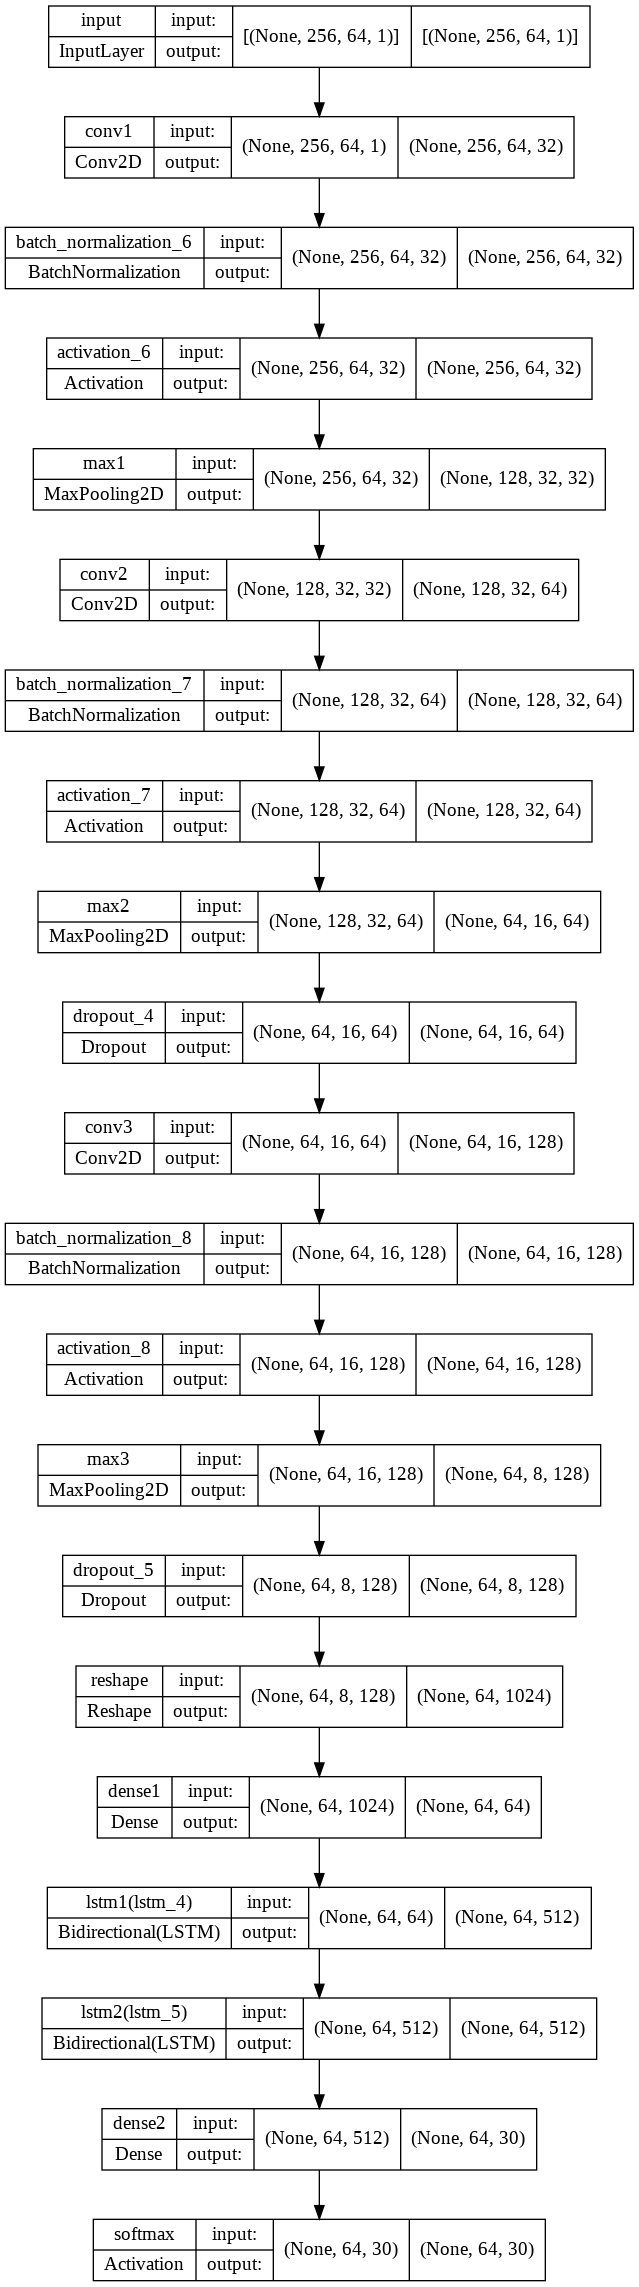

In [ ]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

the ctc loss function


In [ ]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))

model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=15, batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
235/235 [==============================] - 126s 500ms/step - loss: 24.5291 - val_loss: 20.6190
Epoch 2/15
235/235 [==============================] - 114s 487ms/step - loss: 20.1761 - val_loss: 20.0821
Epoch 3/15
235/235 [==============================] - 115s 489ms/step - loss: 19.8377 - val_loss: 19.7400
Epoch 4/15
235/235 [==============================] - 115s 488ms/step - loss: 19.4342 - val_loss: 19.3906
Epoch 5/15
235/235 [==============================] - 115s 490ms/step - loss: 18.7245 - val_loss: 18.3208
Epoch 6/15
235/235 [==============================] - 114s 486ms/step - loss: 17.5416 - val_loss: 16.9298
Epoch 7/15
235/235 [==============================] - 115s 488ms/step - loss: 15.9787 - val_loss: 15.3284
Epoch 8/15
235/235 [==============================] - 114s 487ms/step - loss: 14.1126 - val_loss: 14.5479
Epoch 9/15
235/235 [==============================] - 114s 486ms/step - loss: 11.9024 - val_loss: 15.6335
Epoch 10/15
235/235 [=========================

In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

In [ ]:
y_true = valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 50.22%
Correct words predicted      : 5.07%


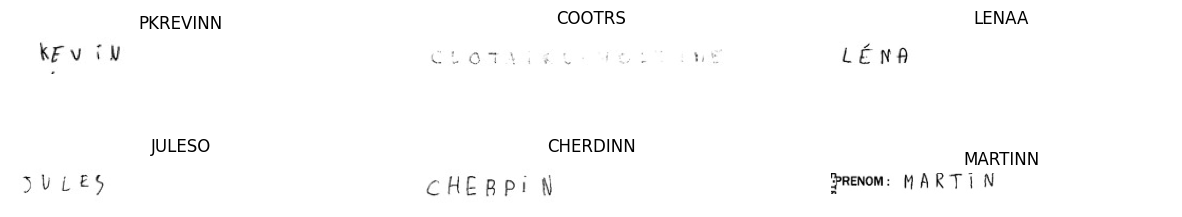

In [ ]:
test = pd.read_csv('/content/handwritten/written_name_test_v2.csv')

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = '/content/handwritten/test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)